<a href="https://colab.research.google.com/github/shindj91/data_set/blob/master/ML_segr_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data loading and a primitive test**

In [ ]:
!python

Python 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> exit()


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Ctrl+Alt+D

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
path = 'drive/My Drive/CCEL/machine_learning/data_segr_2.csv'
df = read_csv(path, header=0)

# split into input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# X = normalize(X.astype('float32')) # input normalization
X = (X-np.mean(X)) / np.std(X) # input standardization

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# # determine the number of input features
# n_features = X_train.shape[1]


# # define model
# model = Sequential()
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# # model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# # model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
# model.add(Dense(1))
# # compile the model
# optimizer = optimizers.Adam()
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae',])

# # fit the model
# callback = EarlyStopping(monitor='val_loss',
#                          patience=30,
#                          verbose=1,
#                          restore_best_weights=True)
# # This callback will stop the training when there is no improvement in
# # the validation loss for three consecutive epochs.

# history = model.fit(X_train, y_train,
#                     validation_data=(X_test, y_test),
#                     epochs=200, batch_size=202, callbacks=[callback],
#                     verbose=1)

# # evaluate the model
# loss, acc = model.evaluate(X_test, y_test, verbose=0)
# print('Test Accuracy, MAE(eV)={:8.5f}, MSE={:8.5f}'.format(acc, loss))

# # plot learning curves
# plt.title('Learning Curves')
# plt.xlabel('Epoch')
# plt.ylabel('MSE (eV)')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='val')
# plt.legend()
# plt.show()

# # make a prediction
# yhat= model.predict(X)
# #print(yhat)
# plt.title('Parity plot for segregation energy')
# plt.xlabel('y (eV)')
# plt.ylabel('y_predicted (eV)')
# plt.scatter(y, yhat)
# bottom, top = plt.xlim()
# plt.ylim(bottom, top)
# plt.show()

(202, 7) (100, 7) (202,) (100,)


In [ ]:
def test_params(X_train, y_train, X_test, y_test,
                structure, learning_rate=0.01,
                kernel_regularizer=None,
                activation='relu', optimizer='adam',
                patience=30, epochs=500, batch_size=32,
                visual=False, verbose=0,
                fig_path=None):
  
  # determine the number of input features
  n_features = X_train.shape[1]
  # define model
  model = Sequential()
  for i in range(len(structure)):
    if i == 0:
      model.add(Dense(structure[i], activation=activation, kernel_initializer='he_normal',
                      kernel_regularizer=kernel_regularizer,
                      input_shape=(n_features,)))
    else:
      model.add(Dense(structure[i], activation=activation, kernel_initializer='he_normal',
                      kernel_regularizer=kernel_regularizer))
  model.add(Dense(1)) # linear activation
  # compile the model
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae',])

  # fit the model
  callback = EarlyStopping(monitor='val_loss',
                          patience=patience,
                          verbose=verbose,
                          restore_best_weights=True)
  # This callback will stop the training when there is no improvement in
  # the validation loss for three consecutive epochs.

  history = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs, batch_size=batch_size, callbacks=[callback],
                      verbose=verbose)

  # evaluate the model
  loss_train, acc_train = model.evaluate(X_train, y_train, verbose=0)
  loss_test, acc_test = model.evaluate(X_test, y_test, verbose=0)
  # print('MAE_train(eV) = {:8.5f} MSE_train = {:8.5f} MAE_test(eV) = {:8.5f}, MSE_test(eV) = {:8.5f}'
  #       .format(acc_train, loss_train, acc_test, loss_test))

  if verbose:
    # model summary
    model.summary()

  if visual:
    fig = plt.figure(figsize=(8,12))
    # plot learning curves
    plt1 = fig.add_subplot(211)
    plt1.set_title('Learning Curves')
    plt1.set_xlabel('Epoch')
    plt1.set_ylabel('MSE (eV)')
    plt1.plot(history.history['loss'], label='train')
    plt1.plot(history.history['val_loss'], label='val')
    plt1.legend()

    # make a prediction
    yhat= model.predict(X)
    plt2 = fig.add_subplot(212)
    plt2.set_title('Parity plot for segregation energy')
    plt2.set_xlabel('y (eV)')
    plt2.set_ylabel('y_predicted (eV)')
    plt2.scatter(y, yhat)
    bottom, top = plt2.get_xlim()
    plt2.set_ylim(bottom, top)
    plt2.text(0.0,-1.0,'{:1.4f}, {:1.4f}, {:1.4f}, {:1.4f}'.format(loss_train, acc_train, loss_test, acc_test), size=10)
    fig.savefig(fig_path, dpi=300, format='png',)
    # fig.show()

  return loss_train, acc_train, loss_test, acc_test, model

#**2.1. Checking if the function works well**

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    test_params(X_train, y_train, X_test, y_test,
                structure=[5, 2],
                epochs=500, batch_size=202, visual=False, verbose=0)
    # return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    test_params(X_train, y_train, X_test, y_test,
                structure=[5, 2],
                epochs=500, batch_size=202, visual=False, verbose=0)
    # return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
print('Warming up ...')
cpu()
gpu()

# Run the op several times.
# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=5, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=5, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Warming up ...
Test Accuracy, MAE(eV)= 0.34222, MSE= 0.19361
Test Accuracy, MAE(eV)= 0.34180, MSE= 0.19351
CPU (s):
Test Accuracy, MAE(eV)= 0.33929, MSE= 0.19051
Test Accuracy, MAE(eV)= 0.34042, MSE= 0.19127
Test Accuracy, MAE(eV)= 0.35291, MSE= 0.20914
Test Accuracy, MAE(eV)= 0.33829, MSE= 0.19033
Test Accuracy, MAE(eV)= 0.34008, MSE= 0.19140
15.25227247099997
GPU (s):
Test Accuracy, MAE(eV)= 0.33829, MSE= 0.19062
Test Accuracy, MAE(eV)= 0.35817, MSE= 0.21056
Test Accuracy, MAE(eV)= 0.34181, MSE= 0.19601
Test Accuracy, MAE(eV)= 0.35185, MSE= 0.19637
Test Accuracy, MAE(eV)= 0.33964, MSE= 0.19126
43.85966759100006
GPU speedup over CPU: 0x


#**3. Hyperparameter tuning**

> a) Optimizer

> b) Learning rate

> c) batch size (can be omitted thanks to small size of data set)

> d) Input noise (maybe later ...)

> e) Network design -number of hidden layers and number of neurons

> f) Regularizers - (L1, L2, dropout etc.)

> But, again, every dataset is different and hyper-parameters will surely be dependent on that. So, for every problem one approach won't do. Plotting the error will give the feel for the dataset and help in finding the 'optimal' hyper-parameters.

**Reference**
##### naive (https://stats.stackexchange.com/users/168306/naive), What is a sensible order for parameter tuning in neural networks?, URL (version: 2018-09-29): https://stats.stackexchange.com/q/369315

#**3.1. Optimizer tuning**

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']
for optimizer in optimizers:
  print("testing {0} ...".format(optimizer), end=' ')
  test_params(X_train, y_train, X_test, y_test,
              structure=[5,], optimizer=optimizer, patience=30,
              epochs=500, batch_size=202, visual=False, verbose=0)


testing Adadelta ... Test Accuracy, MAE(eV)= 1.78354, MSE= 3.45068
testing Adagrad ... Test Accuracy, MAE(eV)= 0.49586, MSE= 0.40160
testing Adam ... Test Accuracy, MAE(eV)= 0.35564, MSE= 0.20164
testing Adamax ... Test Accuracy, MAE(eV)= 0.34911, MSE= 0.19190
testing Ftrl ... Test Accuracy, MAE(eV)= 0.33220, MSE= 0.17784
testing Nadam ... Test Accuracy, MAE(eV)= 0.41600, MSE= 0.28652
testing RMSprop ... Test Accuracy, MAE(eV)= 0.33264, MSE= 0.17570
testing SGD ... Test Accuracy, MAE(eV)= 0.34549, MSE= 0.19459


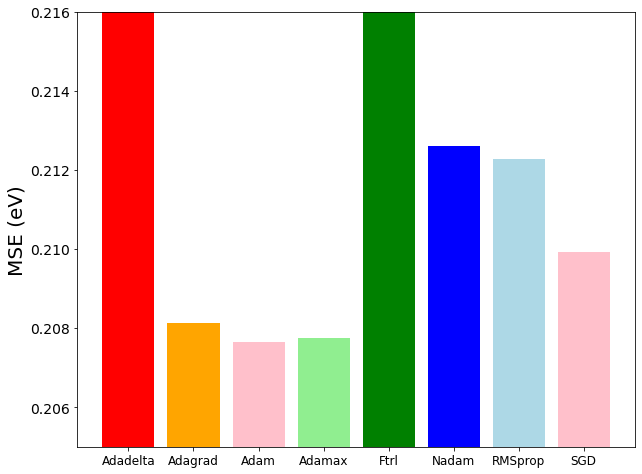

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.bar(optimizers, [2.71274, 0.20813, 0.20764, 0.20776, 0.44872, 0.21262, 0.21229,0.20993],
        color = ['red', 'orange', 'pink', 'lightgreen', 'green', 'blue', 'lightblue', 'pink'])
plt.ylabel('MSE (eV)', fontsize=20)
plt.ylim(0.205, 0.216)
plt.show()

#**3.1.2 Applying K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import KFold
n_split = 5
trial = 5
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']
# optimizers = ['Adadelta']
for num in range(trial):
  print("{}th trial for stochasticity ...".format(num+1))
  for optimizer in optimizers:
    mse_avg, mae_avg = [],[] # for test data
    i = 0
    # print("testing {0} ...".format(optimizer), end=' ')
    print("testing {0} ...".format(optimizer))
    for train_index, test_index in KFold(n_splits = n_split, shuffle=True).split(X):
      i += 1 
      x_train,x_test=X[train_index], X[test_index]
      y_train,y_test=y[train_index], y[test_index]
      print("{}th fold ...".format(i), end=' ')
      # print("train_index: {}, test_index: {}".format(train_index, test_index))

      loss, acc, _ = test_params(x_train, y_train, x_test, y_test,
                              structure=[5,], optimizer=optimizer, patience=100,
                              epochs=1000, batch_size=128, visual=False, verbose=0)

      mse_avg.append(loss)
      mae_avg.append(acc)

    print(sum(mse_avg)/n_split, sum(mae_avg)/n_split)

1th trial for stochasticity ...
testing Adadelta ...
1th fold ... Test Accuracy, MAE(eV)= 0.80582, MSE= 0.94439
2th fold ... Test Accuracy, MAE(eV)= 0.40469, MSE= 0.34266
3th fold ... Test Accuracy, MAE(eV)= 0.99841, MSE= 1.39669
4th fold ... Test Accuracy, MAE(eV)= 0.87439, MSE= 1.07868
5th fold ... Test Accuracy, MAE(eV)= 1.34379, MSE= 2.76710
1.3059057891368866 0.8854183673858642
testing Adagrad ...
1th fold ... Test Accuracy, MAE(eV)= 1.15343, MSE= 1.96300
2th fold ... Test Accuracy, MAE(eV)= 0.45326, MSE= 0.35712
3th fold ... Test Accuracy, MAE(eV)= 0.59518, MSE= 0.53509
4th fold ... Test Accuracy, MAE(eV)= 0.75871, MSE= 0.98507
5th fold ... Test Accuracy, MAE(eV)= 0.57398, MSE= 0.63403
0.8948613047599793 0.7069103598594666
testing Adam ...
1th fold ... Test Accuracy, MAE(eV)= 0.33597, MSE= 0.21448
2th fold ... Test Accuracy, MAE(eV)= 0.34654, MSE= 0.20629
3th fold ... Test Accuracy, MAE(eV)= 0.36066, MSE= 0.21989
4th fold ... Test Accuracy, MAE(eV)= 0.35038, MSE= 0.20670
5th fold

In [ ]:
# load the dataset
path_opt = 'drive/My Drive/CCEL/machine_learning/200818_optimizer_tuning.csv'
errors_optimizer = read_csv(path_opt, header=0)
errors_optimizer = DataFrame(errors_optimizer)

In [ ]:
errors_optimizer

,optimizer,error value,error type,trial
0,Adadelta,1.305906,MSE,1
1,Adadelta,0.885418,MAE,1
2,Adagrad,0.894861,MSE,1
3,Adagrad,0.706910,MAE,1
4,Adam,0.215730,MSE,1
...,...,...,...,...
75,Nadam,0.359297,MAE,5
76,RMSprop,0.220950,MSE,5
77,RMSprop,0.356895,MAE,5
78,SGD,0.226112,MSE,5


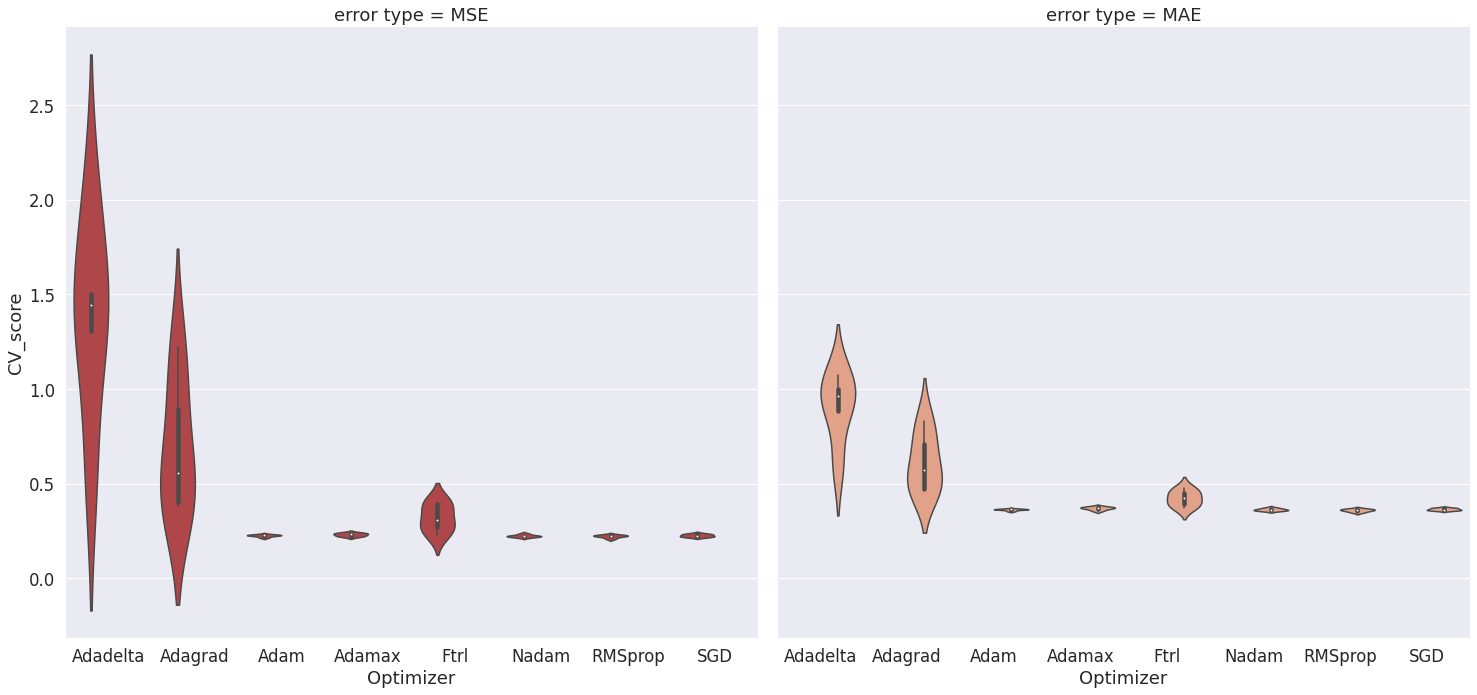

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5, font='sans-serif', palette=sns.color_palette('RdBu'))
errors_opt_mae = errors_optimizer.loc[errors_optimizer['error type']=='MAE']
# ax = sns.violinplot(x="optimizer", y="error value", hue="error type",
#                     data=errors_opt_mae, split=False, height=10, aspect=1.0)
ax = sns.catplot(x="optimizer", y="error value", col="error type", kind="violin",
                 height=10, aspect=1.0, col_wrap=10, hue="error type",
                 data=errors_optimizer, split=False)

ax.set_ylabels('CV_score')
ax.set_xlabels('Optimizer')

# ax.set_xlabel("Optimizer", fontsize=10)
# ax.tick_params(labelsize=5)

#**3.2. Learning Rate Optimization**

In [ ]:
# load the dataset
path = 'drive/My Drive/CCEL/machine_learning/data_segr_2.csv'
df = read_csv(path, header=0)

# split into input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# X = normalize(X.astype('float32')) # input normalization
X = (X-np.mean(X)) / np.std(X) # input standardization

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(202, 7) (100, 7) (202,) (100,)


In [ ]:
from sklearn.model_selection import KFold

n_split = 5
trial = 5
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

for num in range(trial):
  print("{}th trial".format(num+1)) # several trials for stochasticity
  for learning_rate in learning_rates:
    mse_avg, mae_avg = [],[] # for test data
    i = 0
    print("testing learning rate={0} ...".format(learning_rate), end=' ')
    for train_index, test_index in KFold(n_splits = n_split, shuffle=True).split(X):
      i += 1 
      x_train,x_test=X[train_index], X[test_index]
      y_train,y_test=y[train_index], y[test_index]
      print("{}th fold ...".format(i), end=' ')
      # print("train_index: {}, test_index: {}".format(train_index, test_index))

      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      loss, acc, _ = test_params(x_train, y_train, x_test, y_test,
                              structure=[5,], optimizer=optimizer, patience=100,
                              learning_rate=learning_rate,
                              epochs=1000, batch_size=128, visual=False, verbose=0)

      mse_avg.append(loss)
      mae_avg.append(acc)

    print(sum(mse_avg)/n_split, sum(mae_avg)/n_split)

1th trial testing learning rate=0.001 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.2416986495256424 0.3823081195354462
testing learning rate=0.005 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.2221650332212448 0.3611946403980255
testing learning rate=0.01 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.21976820528507232 0.35788699984550476
testing learning rate=0.05 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.2178356021642685 0.3531576573848724
testing learning rate=0.1 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.21592211723327637 0.354800146818161
testing learning rate=0.5 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.21047296226024628 0.3549553155899048
testing learning rate=1.0 ... 1th fold ... 2th fold ... 3th fold ... 4th fold ... 5th fold ... 0.21802457869052888 0.3542192101478577
testing learning rate=5.0 ... 1th fold ... 2th fo

In [ ]:
# load the dataset
path_lr = 'drive/My Drive/CCEL/machine_learning/200822_learning_rate_tuning.csv'
errors_lr = read_csv(path_lr, header=0)
errors_lr = DataFrame(errors_lr)

In [ ]:
errors_lr.tail()

,trial,learning rate,cv_score,score_type,optimizer
75,5,0.05,0.345884,MAE,adam
76,5,0.10,0.358284,MAE,adam
77,5,0.50,0.352511,MAE,adam
78,5,1.00,0.359086,MAE,adam
79,5,5.00,0.356490,MAE,adam


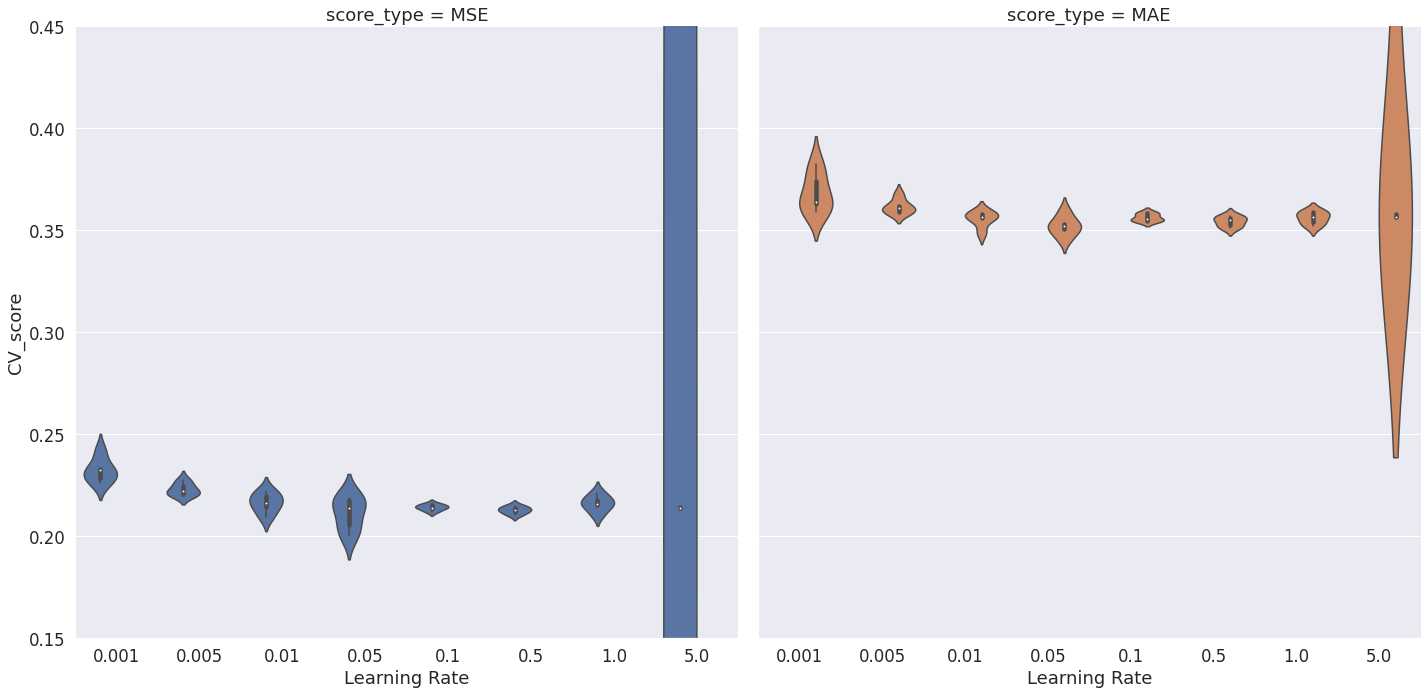

In [ ]:
sns.set(font_scale=1.5, font='sans-serif')#, palette=sns.color_palette('Pastel1'))
# errors_opt_mae = errors_optimizer.loc[errors_optimizer['error type']=='MAE']
# ax = sns.violinplot(x="optimizer", y="error value", hue="error type",
#                     data=errors_opt_mae, split=False, height=10, aspect=1.0)
ax = sns.catplot(x="learning rate", y="cv_score", col="score_type", kind="violin",
                 height=10, aspect=1.0, hue="score_type",
                 data=errors_lr, split=False)

plt.ylim(0.15, 0.45)
ax.set_ylabels('CV_score')
ax.set_xlabels('Learning Rate')

# ax.set_xlabel("Optimizer", fontsize=10)
# ax.tick_params(labelsize=5)

#**3.2. Neural Net Structure Optimization**

In [ ]:
structures = [[i] for i in range(1,11,1)]; 
print(structures)
structures = [[i,j] for i in range(1,11) for j in range(1,11)]
print(structures)
structures = [[i,j,k] for i in range(1,11) for j in range(1,11) for k in range(1,11)]
print(structures, len(structures))

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [5, 9], [5, 10], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [9, 10], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [10, 8], [10, 9], [10, 10]]
[[1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7], [1, 1, 8], [1, 1, 9], [1, 1, 10], [1, 2, 1], [1, 

In [ ]:
from sklearn.model_selection import KFold

n_split = 5
trial = 5
learning_rates = 0.1
# structures = [[i,j,k] for i in range(1,11) for j in range(1,11) for k in range(1,11)]
structures = [[i] for i in range(1,11,1)]

print("trial,structure,cv_score,score_type,optimizer ")
for num in range(trial):
  # print("{}th trial".format(num+1)) # several trials for stochasticity
  for structure in structures:
    mse_avg, mae_avg = [],[] # for test data
    i = 0
    for train_index, test_index in KFold(n_splits = n_split, shuffle=True).split(X):
      i += 1 
      x_train,x_test=X[train_index], X[test_index]
      y_train,y_test=y[train_index], y[test_index]
      # print("...".format(i), end=' ') # fold
      # print("train_index: {}, test_index: {}".format(train_index, test_index))

      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      loss, acc, _ = test_params(x_train, y_train, x_test, y_test,
                              structure=structure, optimizer=optimizer, patience=100,
                              learning_rate=learning_rate,
                              epochs=1000, batch_size=128, visual=False, verbose=0)

      mse_avg.append(loss)
      mae_avg.append(acc)

    print('{},{},{},{},{}'.format(num+1, structure, sum(mse_avg)/n_split, 'MSE', 'adam'))
    print('{},{},{},{},{}'.format(num+1, structure, sum(mae_avg)/n_split, 'MAE', 'adam'))

trial, structure, cv_score, cv_type, optimizer 
1, [1], 0.21535497009754181, MSE, adam
1, [1], 0.35589197278022766, MAE, adam
1, [2], 0.21470121741294862, MSE, adam
1, [2], 0.355256062746048, MAE, adam
1, [3], 0.21466258764266968, MSE, adam
1, [3], 0.35700615048408507, MAE, adam
1, [4], 0.21459527611732482, MSE, adam
1, [4], 0.357726925611496, MAE, adam
1, [5], 0.21084094047546387, MSE, adam
1, [5], 0.35390899777412416, MAE, adam
1, [6], 0.2157016783952713, MSE, adam
1, [6], 0.3569644868373871, MAE, adam
1, [7], 0.2100910186767578, MSE, adam
1, [7], 0.3547269344329834, MAE, adam
1, [8], 0.21608014404773712, MSE, adam
1, [8], 0.3566698431968689, MAE, adam
1, [9], 0.21659632325172423, MSE, adam
1, [9], 0.35797142386436465, MAE, adam
1, [10], 0.21430150866508485, MSE, adam
1, [10], 0.3525246620178223, MAE, adam
2, [1], 0.21709851026535035, MSE, adam
2, [1], 0.3572955310344696, MAE, adam
2, [2], 0.2155678927898407, MSE, adam
2, [2], 0.35727010369300843, MAE, adam
2, [3], 0.2137010186910629

In [ ]:
# load the dataset
path_st = 'drive/My Drive/CCEL/machine_learning/200822_structure_tuning.csv'
errors_st = read_csv(path_st, header=0)
errors_st = DataFrame(errors_st)

In [ ]:
errors_st.head()

,trial,structure,cv_score,score_type,optimizer
0,1,1,0.215355,MSE,adam
1,1,1,0.355892,MAE,adam
2,1,2,0.214701,MSE,adam
3,1,2,0.355256,MAE,adam
4,1,3,0.214663,MSE,adam


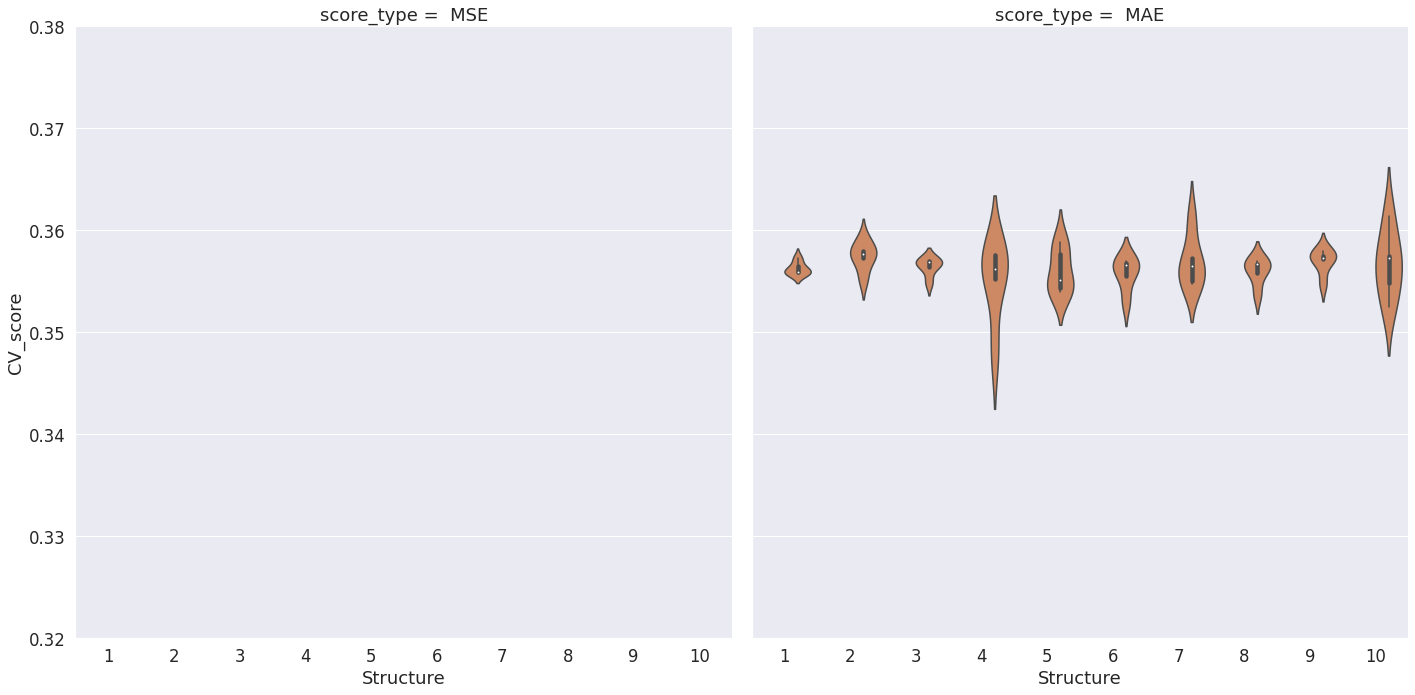

In [ ]:
sns.set(font_scale=1.5, font='sans-serif')#, palette=sns.color_palette('Pastel1'))
# errors_opt_mae = errors_optimizer.loc[errors_optimizer['error type']=='MAE']
# ax = sns.violinplot(x="optimizer", y="error value", hue="error type",
#                     data=errors_opt_mae, split=False, height=10, aspect=1.0)
ax = sns.catplot(x=" structure", y=" cv_score", col="score_type", kind="violin",
                 height=10, aspect=1.0, hue="score_type",
                 data=errors_st, split=False)

plt.ylim(0.32, 0.38)
ax.set_ylabels('CV_score')
ax.set_xlabels('Structure')

# ax.set_xlabel("Optimizer", fontsize=10)
# ax.tick_params(labelsize=5)

#3.2.1. NN optimization (updated, 200824)

In [ ]:
structures = [[9,4], [10,4]] + [[i,j] for j in range(5,11) for i in range(1,11)]
structures

trial,structure,cv_mse_train,cv_mae_train,cv_mse_test,cv_mae_test
...  ...  ...  ...  ...  ...  ...  ...  ...  ...  1,[15, 30, 25, 15, 5],0.12589002326130866,0.18019044250249863,0.15158647298812866,0.21752882301807402


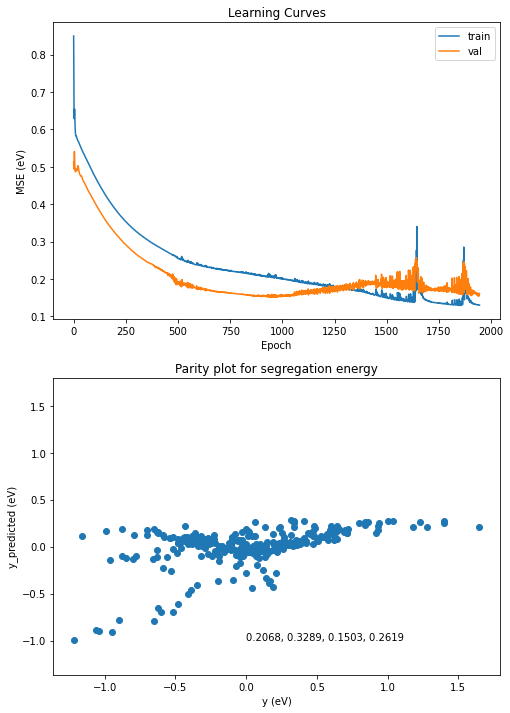

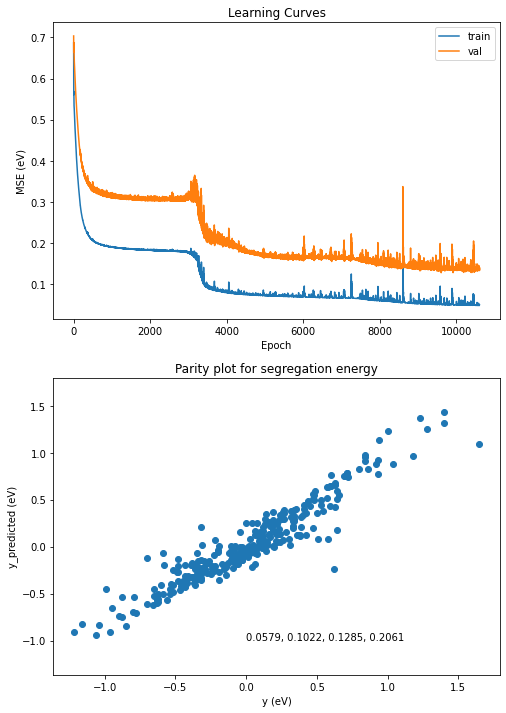

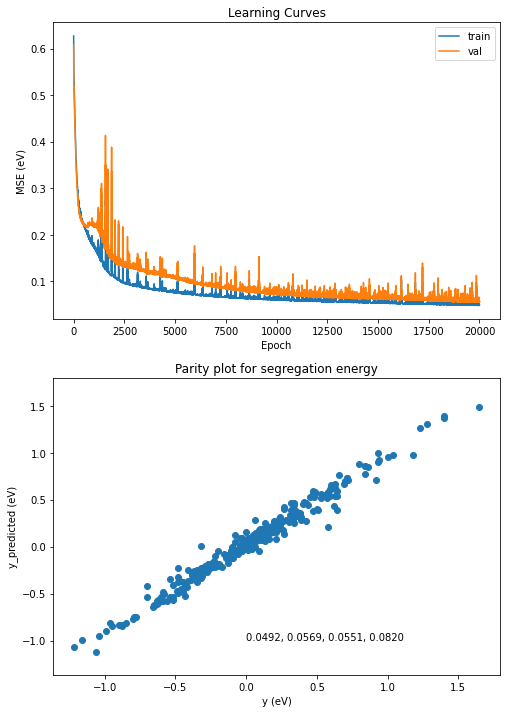

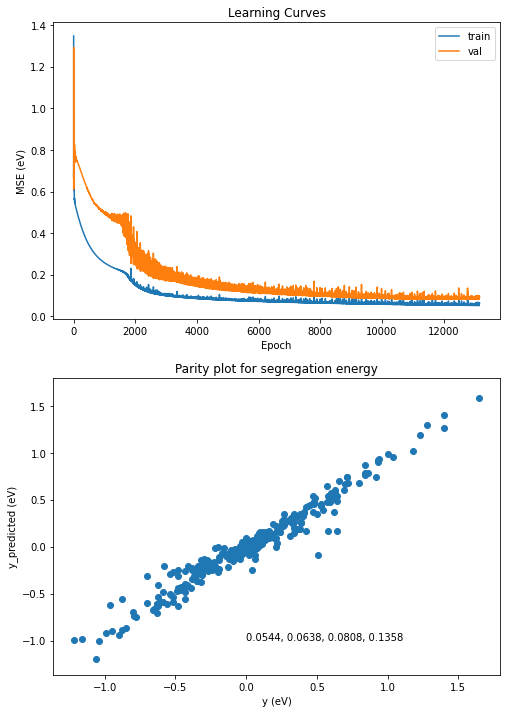

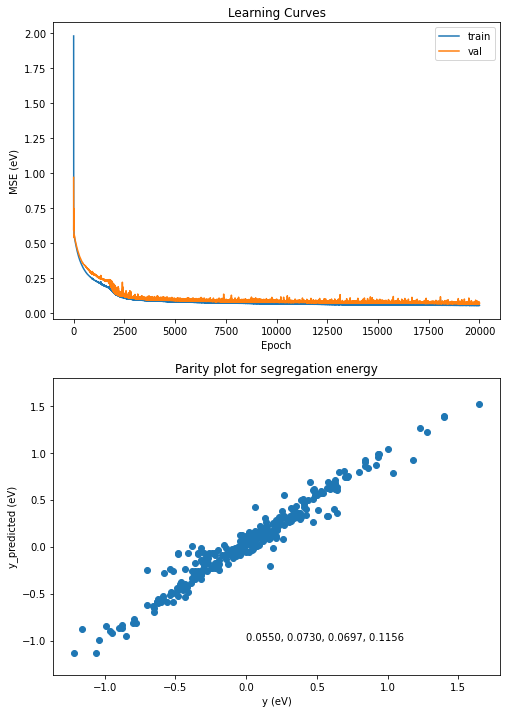

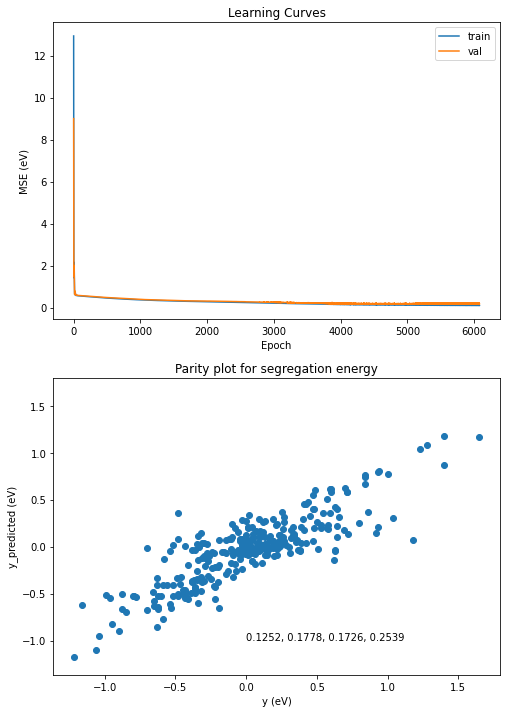

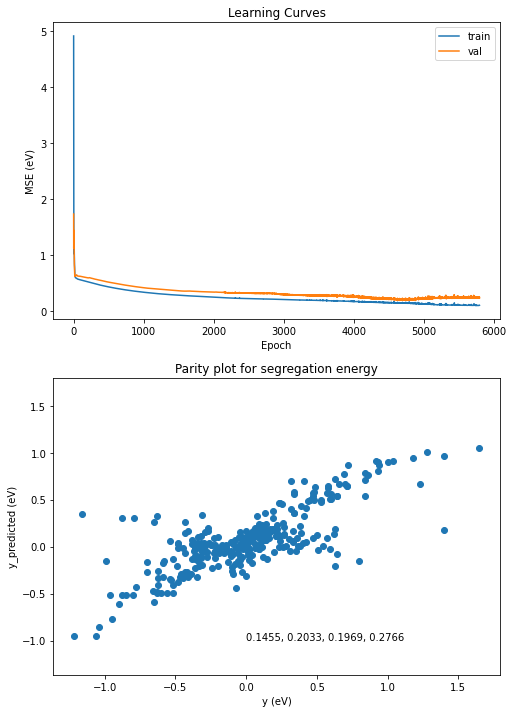

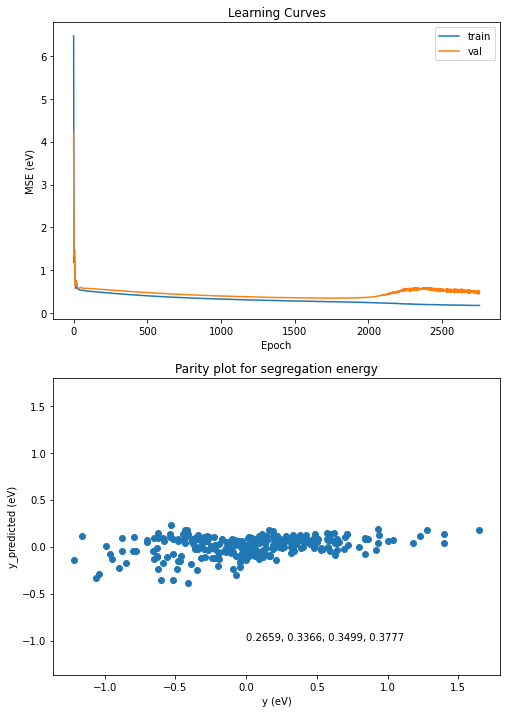

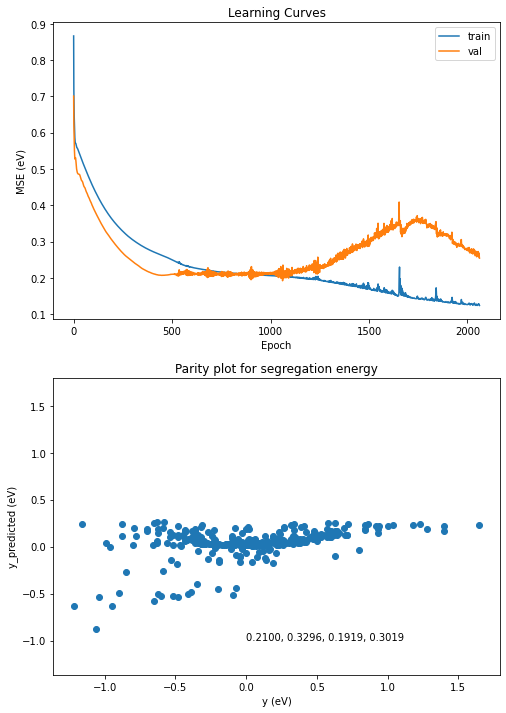

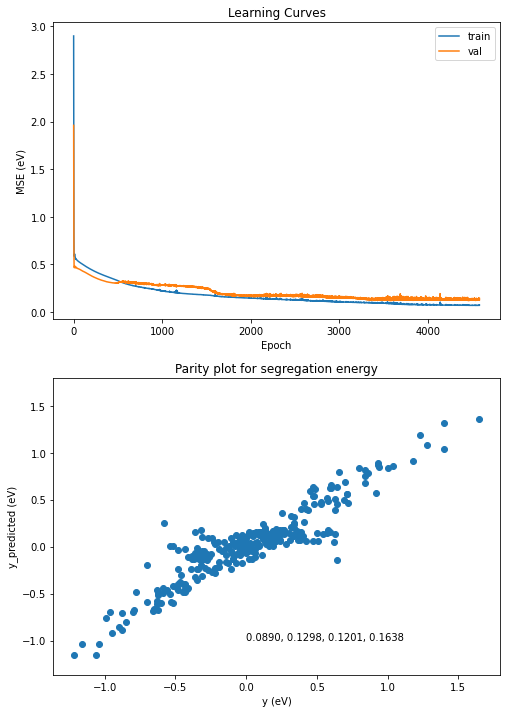

In [ ]:
from sklearn.model_selection import KFold

n_split = 10
trial = 1
learning_rate = 0.003
# structures = [[i,j] for i in range(1,11) for j in range(1,11)]
# structures = [[9,8], [10,8]] + [[i,j] for j in range(9,11) for i in range(1,11)]
structures = [[15,30,25,15,5]]

print("trial,structure,cv_mse_train,cv_mae_train,cv_mse_test,cv_mae_test")
for num in range(trial):
  # print("{}th trial".format(num+1)) # several trials for stochasticity
  for structure in structures:
    mse_avg_train, mae_avg_train, mse_avg_test, mae_avg_test = [],[],[],[]
    i = 0
    for train_index, test_index in KFold(n_splits = n_split, shuffle=True).split(X):
      print('... ', end=' ')
      i += 1 
      x_train,x_test=X[train_index], X[test_index]
      y_train,y_test=y[train_index], y[test_index]
      # print("...".format(i), end=' ') # fold
      # print("train_index: {}, test_index: {}".format(train_index, test_index))

      model_path = '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/{}_{}_cv{}'.format(str(structure), learning_rate, i)
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      loss_train, acc_train, loss_test, acc_test, model = test_params(x_train, y_train, x_test, y_test,
                                                                       structure=structure, optimizer=optimizer, patience=1000,
                                                                       activation=tf.keras.layers.LeakyReLU(),
                                                                       kernel_regularizer=tf.keras.regularizers.l2(l2=0.002),
                                                                       learning_rate=learning_rate,
                                                                       epochs=20000, batch_size=302, visual=True, verbose=0,
                                                                       fig_path=model_path+'.png')

      model.save(model_path+'.h5')

      mse_avg_train.append(loss_train)
      mae_avg_train.append(acc_train)
      mse_avg_test.append(loss_test)
      mae_avg_test.append(acc_test)

    # print('MAE_train(eV) = {:8.5f} MSE_train = {:8.5f} MAE_test(eV) = {:8.5f}, MSE_test(eV) = {:8.5f}'
    #       .format(acc_train, loss_train, acc_test, loss_test
    print('{},{},{},{},{},{}'.format(num+1,
                                  structure, 
                                  sum(mse_avg_train)/n_split, 
                                  sum(mae_avg_train)/n_split,
                                  sum(mse_avg_test)/n_split, 
                                  sum(mae_avg_test)/n_split))

왜 structure에 따른 차이가 별로 없어 보이지? visual을 켜고 early_stopping 을 꺼보자.

#3.3. Regularizer Optimization (L2, $\lambda$ tuning)#

In [ ]:
from sklearn.model_selection import KFold

n_split = 5
trial = 5
learning_rates = 0.1
structure = ?
lambds = []

print("trial, structure, cv_score, cv_type, optimizer ")
for num in range(trial):
  # print("{}th trial".format(num+1)) # several trials for stochasticity
  for lambd in lambds:
    mse_avg, mae_avg = [],[] # for test data
    i = 0
    for train_index, test_index in KFold(n_splits = n_split, shuffle=True).split(X):
      i += 1 
      x_train,x_test=X[train_index], X[test_index]
      y_train,y_test=y[train_index], y[test_index]
      # print("...".format(i), end=' ') # fold
      # print("train_index: {}, test_index: {}".format(train_index, test_index))

      kernel_regularizer = tf.keras.regularizers.l2(l2=lambd)
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
      loss, acc, _ = test_params(x_train, y_train, x_test, y_test,
                                 kernel_regularizer=kernel_regularizer,
                                 structure=structure, optimizer=optimizer, patience=100,
                                 learning_rate=learning_rate,
                                 epochs=1000, batch_size=128, visual=False, verbose=0)

      mse_avg.append(loss)
      mae_avg.append(acc)

    print('{}, {}, {}, {}, {}'.format(num+1, structure, sum(mse_avg)/n_split, 'MSE', 'adam'))
    print('{}, {}, {}, {}, {}'.format(num+1, structure, sum(mae_avg)/n_split, 'MAE', 'adam'))

#regular test (baby-sitting)

training structure: [11, 14, 11, 5] ...
Epoch 1/100
1/1 [==============================] - 0s 149ms/step - loss: 3.1917 - mae: 1.6128 - val_loss: 2.6067 - val_mae: 1.4179
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 2.6499 - mae: 1.4470 - val_loss: 2.1667 - val_mae: 1.2655
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 2.1897 - mae: 1.2905 - val_loss: 1.7984 - val_mae: 1.1223
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 1.8054 - mae: 1.1443 - val_loss: 1.4905 - val_mae: 0.9876
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 1.4860 - mae: 1.0106 - val_loss: 1.2355 - val_mae: 0.8659
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 1.2221 - mae: 0.8861 - val_loss: 1.0270 - val_mae: 0.7548
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 1.0054 - mae: 0.7710 - val_loss: 0.8559 - val_mae: 0.6594
Epoch 8/100
1/1 [==============================] 

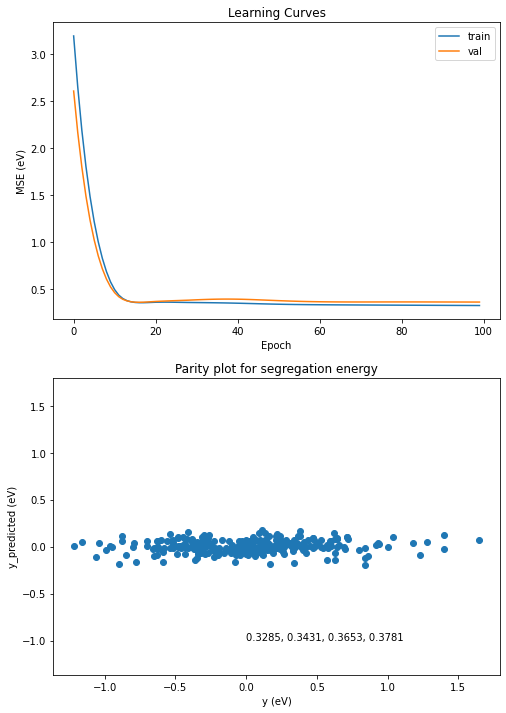

In [ ]:
# load the dataset
path = 'drive/My Drive/CCEL/machine_learning/data_segr_2.csv'
df = read_csv(path, header=0)

# split into input and output columns
X, y = df.values[:,:-1], df.values[:,-1]
# X = normalize(X.astype('float32')) # input normalization
X = (X-np.mean(X)) / np.std(X) # input standardization

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# structures = [[i, j, k] for i in range(10,12) for j in range(10,15) for k in range(10,15)]
# structures = [[i, j] for i in range(1,11) for j in range(1,11)]
structures = [[11, 14, 11, 5]]
# for lr in [0.002, 0.003, 0.004, 0.005]:
for structure in structures:
  lr = 0.003
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  # lambd = 0.1
  # kernel_regularizer = tf.keras.regularizers.l2(l2=lambd)

  model_path =  '/content/drive/My Drive/CCEL/machine_learning/200822_structure_tuning/{}_{}_long_long'.format(str(structure), lr)

  print('training structure: {} ...'.format(str(structure)))
  _, _, _, _, model = test_params(X_train, y_train, X_test, y_test,
                            structure=structure, optimizer=optimizer, patience=1000,
                            activation=tf.keras.layers.LeakyReLU(),
                            kernel_regularizer=tf.keras.regularizers.l2(l2=0.002),
                            epochs=100, batch_size=202, visual=True, verbose=1,
                            fig_path=model_path + '.png')

  model.save(model_path + '.h5')

baby sitting으로 확인해보니 sigmoid가 잘 작동함. activation function으로도 hyperparameter tuning 필요 (200822)

# Load Models and Evaluate

In [ ]:
from glob import glob
# furthers = [[11, 10, 11], [11, 14, 11], [11, 14, 14], [13, 10, 14]]
# furthers = [[30,15,7,3]]
furthers = [[15,30,25,15,5]]
model_path = '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/'
model_paths = glob(model_path+'*.h5')
print(model_paths)

# for path in model_paths:
for further in furthers:
  model = tf.keras.models.load_model(model_path+str(further)+'_0.003_cv2.h5', 
                                     custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})
  # evaluate the model
  mse_test, mae_test = model.evaluate(X_test, y_test, verbose=0)
  mse, mae = model.evaluate(X, y, verbose=0)
  print(model_path+str(further)+', {}, {}, {}, {}'.format(mae_test, mse_test, mae, mse))
  

['/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv1.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv2.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv3.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv4.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv5.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv6.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv7.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv8.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv9.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[1, 9]_0.003_cv10.h5', '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuni

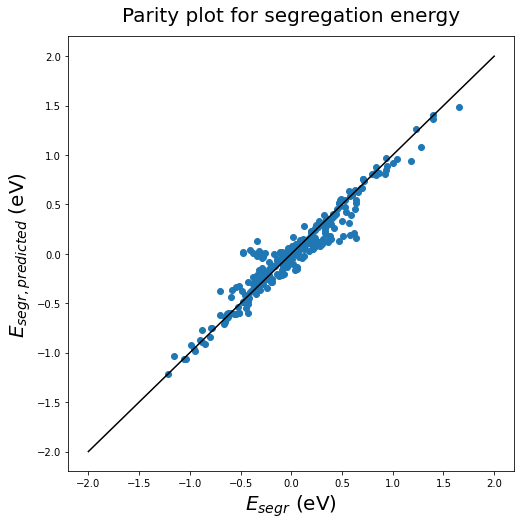

In [ ]:
# fig_path = '/content/drive/My Drive/CCEL/machine_learning/200822_structure_tuning/[11, 14, 11]_0.003_parity.png'

yhat= model.predict(X)
fig = plt.figure(figsize=(8,8))
plt2 = fig.add_subplot(111)
plt2.set_title('Parity plot for segregation energy', fontsize=20, pad=15)
plt2.set_xlabel('$E_{segr}$ (eV)', fontsize=20)
plt2.set_ylabel('$E_{segr,predicted}$ (eV)', fontsize=20)
plt2.scatter(y, yhat)
plt.plot([-2,2],[-2,2], c='k')
# plt.text(1.0,-1.5,'MAE=0.16 eV', size=10)
bottom, top = plt2.get_xlim()
plt2.set_ylim(bottom, top)
fig.show()
# fig.savefig(fig_path, dpi=300, format='png')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = 'drive/My Drive/CCEL/machine_learning/dcenter_shift.csv'
df = read_csv(path, header=0)
elements = list(df.columns[1:])
elements

['Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni',
 'Cu',
 'Zr',
 'Nb',
 'Mo',
 'Tc',
 'Ru',
 'Rh',
 'Pd',
 'Ag',
 'Hf',
 'Ta',
 'W',
 'Re',
 'Os',
 'Ir',
 'Pt',
 'Au']

In [ ]:
radius = {
            'Ti':3.05,
            'V': 2.82,
            'Cr':2.68,
            'Mn':2.70,
            'Fe':2.66,
            'Co':2.62,
            'Ni':2.60,
            'Cu':2.67,
            'Zr':3.35,
            'Nb':3.07,
            'Mo':2.99,
            'Tc':2.84,
            'Ru':2.79,
            'Rh':2.81,
            'Pd':2.87,
            'Ag':3.01,
            'Hf':3.30,
            'Ta':3.07,
            'W': 2.95,
            'Re':2.87,
            'Os':2.83,
            'Ir':2.84,
            'Pt':2.90,
            'Au':3.00 }

tension = {
            'Ti':1.650,
            'V': 1.950,
            'Cr':1.590,
            'Mn':1.060,
            'Fe':1.880,
            'Co':1.880,
            'Ni':1.780,
            'Cu':1.300,
            'Zr':1.480,
            'Nb':1.900,
            'Mo':2.250,
            'Tc':2.100,
            'Ru':2.250,
            'Rh':2.000,
            'Pd':1.500,
            'Ag':0.895,
            'Hf':1.630,
            'Ta':2.150,
            'W': 2.400,
            'Re':2.700,
            'Os':2.500,
            'Ir':2.250,
            'Pt':1.800,
            'Au':1.140 }

In [ ]:
list_of_dict = [dict(zip(elements, [np.absolute(tension[element_host]-tension[element_impurity]) for element_host in elements])) for element_impurity in elements]
del_tension = dict(zip(elements, list_of_dict))

list_of_dict = [dict(zip(elements, [np.absolute(radius[element_host]-radius[element_impurity]) for element_host in elements])) for element_impurity in elements]
del_radius = dict(zip(elements, list_of_dict))

list_of_dict = [dict(zip(elements, [df[element][i] for i in range(24)])) for element in elements]
del_dcenter = dict(zip(elements,list_of_dict))

In [ ]:
DataFrame(del_dcenter)

,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Hf,Ta,W,Re,Os,Ir,Pt,Au
Ti,0.00,0.20,0.10,-0.53,1.02,0.54,0.33,-0.24,-0.16,0.33,0.79,0.66,0.82,0.27,-1.00,-0.80,-0.04,0.12,0.91,0.88,1.11,0.71,-0.50,-1.22
V,-0.18,0.00,0.53,0.60,0.12,-0.02,-0.26,-0.76,-0.38,0.02,0.32,0.04,0.04,-0.60,-1.82,-1.45,-0.22,-0.17,0.48,0.28,0.32,-0.19,-1.42,-2.00
Cr,-0.64,-0.51,0.00,0.10,-0.30,-0.04,-0.27,-0.76,-0.95,-0.64,-0.36,-0.63,-0.55,-1.03,-2.11,-1.58,-0.81,-0.83,-0.24,-0.45,-0.34,-0.75,-1.83,-2.26
Mn,-1.00,-0.80,-0.20,0.00,-0.19,-0.05,-0.27,-0.60,-1.37,-0.98,-0.64,-0.80,-0.64,-1.05,-2.00,-1.44,-1.22,-1.20,-0.54,-0.67,-0.49,-0.84,-1.81,-2.15
Fe,-1.66,-0.76,0.19,0.20,0.00,0.06,-0.26,-0.43,-1.19,-1.36,-0.36,-0.93,-0.13,-0.58,-1.13,-1.25,-1.16,-1.04,-0.54,-0.54,0.67,-0.29,-1.25,-1.79
Co,-1.05,-0.88,-0.59,0.32,0.16,0.00,-0.23,-0.44,-1.46,-1.04,-0.60,-0.36,0.12,-0.50,-1.53,-1.19,-1.34,-1.28,-0.56,-0.42,0.25,-0.28,-1.19,-1.85
Ni,-1.16,-0.89,0.11,0.28,-0.74,-0.21,0.00,-0.05,-1.50,-1.07,-0.61,-0.34,0.01,-0.34,-1.20,-0.77,-1.36,-1.32,-0.57,-0.45,0.16,-0.01,-0.90,-1.34
Cu,-1.07,-0.32,0.55,0.83,-0.66,1.10,0.57,0.00,-1.66,-0.68,0.15,0.41,0.79,0.42,-0.78,-0.70,-1.63,-1.02,0.11,0.48,0.99,0.77,-0.36,-1.12
Zr,0.14,-0.17,0.45,0.25,-0.46,1.14,-0.05,0.10,0.00,0.53,1.04,0.98,1.18,0.72,-0.50,-0.37,0.11,0.30,1.15,1.19,1.49,1.17,0.02,-0.71
Nb,-0.05,0.00,0.16,-0.61,0.87,0.81,-1.35,-0.34,-0.22,0.00,0.61,0.42,0.51,-0.02,-1.19,-0.87,-0.08,0.04,0.75,0.65,0.80,0.37,-0.76,-1.33


In [ ]:
del_dcenter['V']['Co']

-0.88

In [ ]:
filename = '/content/drive/My Drive/CCEL/machine_learning/200824_structure_tuning/[30, 15, 7, 3]_0.003_cv2.h5'

In [ ]:
columns_list = list(df.columns)
columns_list

In [ ]:
def Esegr_direct(model_path, input):
  # load the model
  loaded_model = tf.keras.models.load_model(model_path, 
                                     custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})

  # load the dataset
  path = 'drive/My Drive/CCEL/machine_learning/data_segr_2.csv'
  df = read_csv(path, header=0)

  # split into input and output columns
  X = df.values[:,:-1]
  mean = np.mean(X)
  std = np.std(X) # input standardization

  input = np.array(input).reshape(1,-1)
  input_norm = (input-mean) / std # input standardization

  Esegr = loaded_model.predict(input_norm)
  return float(Esegr)

In [ ]:
columns_list

In [ ]:
host_facet = 643
# element_host = 'Cu'
# element_impurity = 'Ag'

Esegr = DataFrame(
                  [dict(zip(columns_list+['element_host','element_impurity','host_facet'],
                            [6, 4, 3, 6, del_tension[element_host][element_impurity], del_radius[element_host][element_impurity], del_dcenter[element_host][element_impurity], 
                            Esegr_direct(filename, [6, 4, 3, 6, del_tension[element_host][element_impurity], del_radius[element_host][element_impurity], del_dcenter[element_host][element_impurity]]), 
                            element_host, element_impurity, host_facet])) for element_impurity in elements for element_host in elements]
                  )


In [ ]:
Esegr_direct(filename,[1,1,1,6,0,0,0])

0.25288495421409607

In [ ]:
sns.set(font_scale=0.95, font='sans-serif')#, palette=sns.color_palette('Pastel1'))
# errors_opt_mae = errors_optimizer.loc[errors_optimizer['error type']=='MAE']

Esegr_pivot = Esegr.pivot("element_host","element_impurity","Esegr",)

KeyError: ignored

## **In periodic order**

In [ ]:
filename = '/content/drive/My Drive/CCEL/machine_learning/200827_SVR/{}_{}_cv{}.sav'.format(5000, 0.036000000000000004, 2)

In [ ]:
list_of_dict = [dict(zip(elements, [Esegr_direct(filename, [6, 4, 3, 6, del_tension[element_host][element_impurity], del_radius[element_host][element_impurity], del_dcenter[element_host][element_impurity]]) for element_impurity in elements])) for element_host in elements]
Esegr_pair = dict(zip(elements, list_of_dict))

list_of_dict2 = [dict(zip(elements, [0 for element_impurity in elements])) for element_host in elements]
Esegr_mask = dict(zip(elements, list_of_dict2))

for element1 in elements:
  for element2 in elements:
    if element1 is element2:
      Esegr_mask[element1][element2] = True
    else:
      Esegr_mask[element1][element2] = False 

DataFrame(Esegr_mask).head()

,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Hf,Ta,W,Re,Os,Ir,Pt,Au
Ti,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
V,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Cr,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Mn,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Fe,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
DataFrame(Esegr_pair).head()

,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Hf,Ta,W,Re,Os,Ir,Pt,Au
Ti,0.241742,-0.228684,-0.283876,-0.307915,-0.148972,-0.402843,-0.465352,-0.896848,-0.142405,0.027558,0.235299,-0.116837,-0.109586,-0.276353,0.862381,-1.284967,-0.036308,-0.272587,0.265788,0.389223,0.138112,-0.062748,-0.101792,-0.096891
V,-0.620386,0.241742,-0.067504,0.416644,-0.062121,-0.039318,-0.149278,-1.274383,-1.283632,-0.104553,-0.185351,0.106682,-0.115657,0.390832,-0.481495,-1.747254,-0.802156,-0.261101,-0.046351,0.566214,0.128482,-0.350323,1.450592,-1.409658
Cr,0.211184,-0.178448,0.241742,-0.146666,-0.304925,-0.241304,-0.192244,1.365957,0.116615,-0.918327,-0.307117,-0.326155,-1.892317,-0.419515,1.633008,-0.133511,0.080862,0.219829,-0.397866,-0.805903,-1.782226,-1.278650,1.636854,0.219367
Mn,-0.158828,-1.024806,0.668699,0.241742,-1.623377,-0.078629,-0.566787,0.524929,1.687773,0.296756,-0.834544,-1.326420,-1.666017,-1.470366,-0.139313,1.875676,1.435131,-0.916676,-1.243238,-2.347175,-1.873763,-1.694744,-0.985957,2.041982
Fe,2.076836,0.216799,0.087223,1.167667,0.241742,0.154402,0.243551,-0.453066,0.758356,1.011296,-0.987730,0.703087,-0.568013,0.020686,0.166411,-0.721765,0.236750,0.353961,-0.438708,-1.494568,-0.001586,-0.833487,1.374758,-0.384257


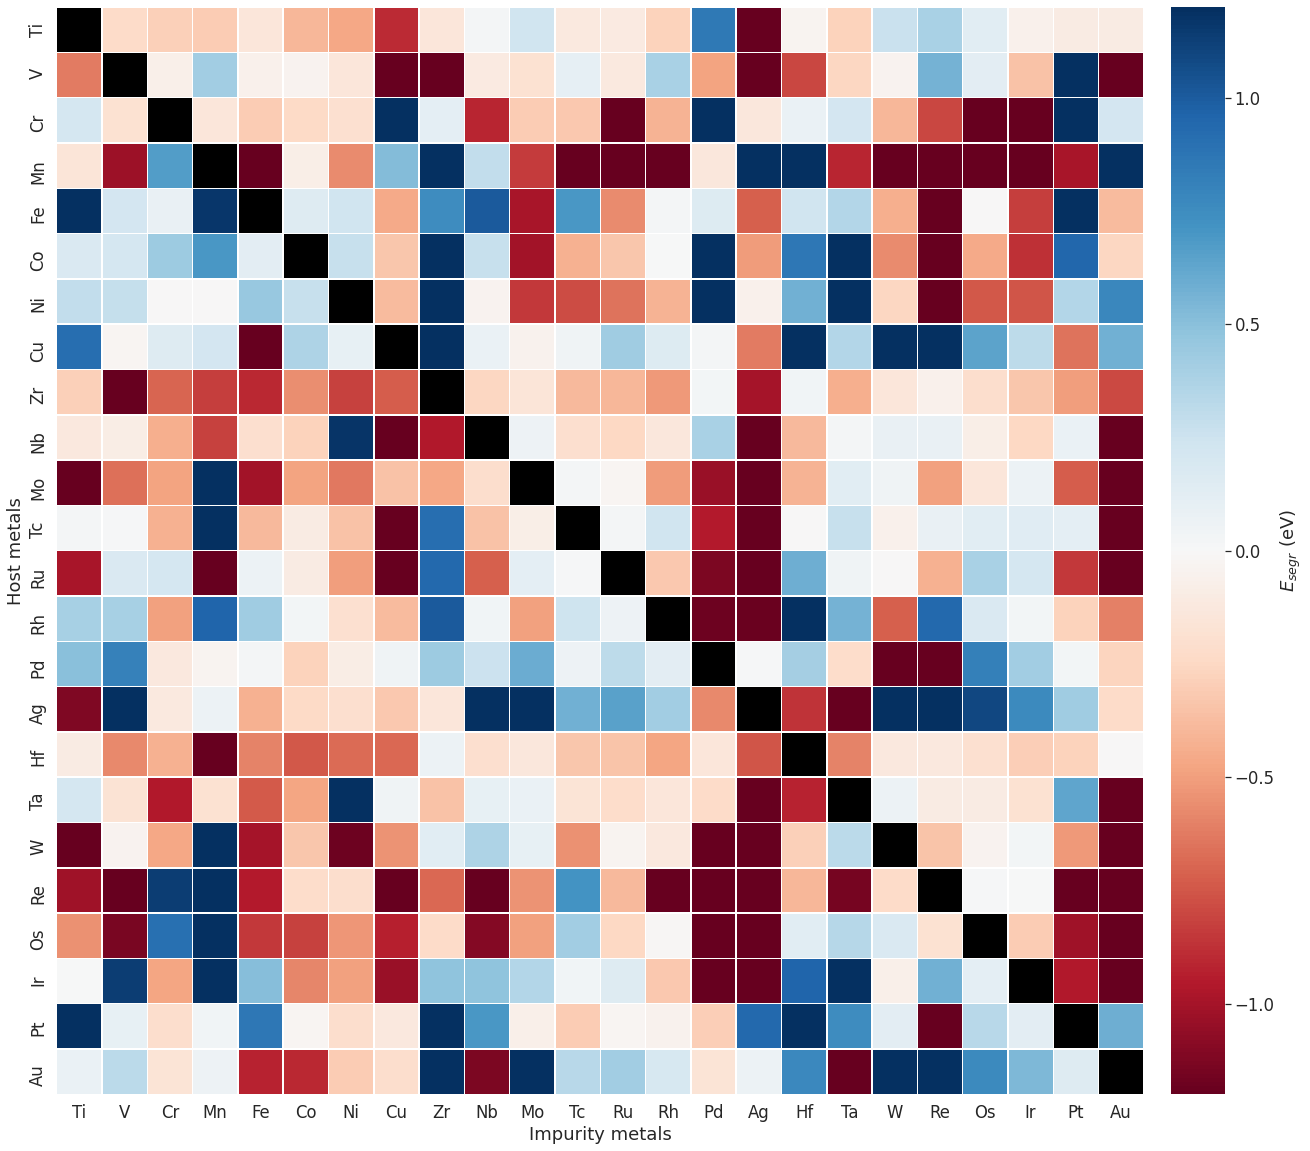

In [ ]:
sns.set(font_scale=1.50, font='sans-serif',)#, palette=sns.color_palette('Pastel1'))
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(24, 20))
heatmap = sns.heatmap(DataFrame(Esegr_pair), annot=False, fmt="1.2f",
                      linewidths=.5, ax=ax, cmap='RdBu',square=True,
                      mask=DataFrame(Esegr_mask),
                      vmin=-1.2, vmax=1.2, cbar_kws={'label': '$E_{segr}$ (eV)', 'pad': 0.02})

heatmap.set_xlabel('Impurity metals')
heatmap.set_ylabel('Host metals')
heatmap.set_facecolor('black')


Esegr_direct 함수상에서는 제대로 나오는 것 같은데 여기서는 부호가 반대인듯 함. -> host, impurity index가 반대로 되어 있었음.

In [ ]:
Esegr

,Unnamed: 0,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zr,Nb
0,6,4,3,6,0.00,0.00,0.00,1.136640,Ti,Ti,643
1,6,4,3,6,0.30,0.23,-0.18,-3.307569,V,Ti,643
2,6,4,3,6,0.06,0.37,-0.64,-2.052896,Cr,Ti,643
3,6,4,3,6,0.59,0.35,-1.00,2.502372,Mn,Ti,643
4,6,4,3,6,0.23,0.39,-1.66,1.453920,Fe,Ti,643
...,...,...,...,...,...,...,...,...,...,...,...
571,6,4,3,6,1.56,0.13,-1.68,0.294807,Re,Au,643
572,6,4,3,6,1.36,0.17,-1.53,-1.300089,Os,Au,643
573,6,4,3,6,1.11,0.16,-1.11,-4.567246,Ir,Au,643
574,6,4,3,6,0.66,0.10,-0.21,-0.323309,Pt,Au,643
